 # 10. Differential Forms

In [2]:
from spb import plot_geometry
from spb.defaults import cfg
from sympy import (
    Add,
    Circle,
    cos,
    Curve,
    Eq,
    Function,
    Idx,
    IndexedBase,
    Integral,
    Lambda,
    line_integrate,
    pi,
    Point,
    sin,
    Sum,
    Symbol,
    symbols
)
from sympy.vector import (
    CoordSys3D,
    vector_integrate
)

cfg['matplotlib']['show_minor_grid'] = True

In [3]:
a, b, c, d, x, y = symbols('a, b, c, d, x, y')
f = Function('f')

Integral(f(x), (x, a, b))

Integral(f(x), (x, a, b))

In [4]:
P = Function('P')
Q = Function('Q')

Integral(P(x, y) + Q(x, y), (x, a, c), (y, b, d))

Integral(P(x, y) + Q(x, y), (x, a, c), (y, b, d))

In [5]:
dx, dy, omega = symbols('dx, dy, ω')

omega = P(x, y)*dx + Q(x, y)*dy
omega

dx*P(x, y) + dy*Q(x, y)

In [6]:
Eq(
    f(x, y).diff(x, y),
    f(x, y).diff(y, x)
)

True

In [7]:
Eq(
    P(x, y).diff(y),
    Q(x, y).diff(x)
)

Eq(Derivative(P(x, y), y), Derivative(Q(x, y), x))

In [8]:
i = Idx('i')
n = Symbol('n')
x = IndexedBase('x')
y = IndexedBase('y')

Sum(
    P(x[i], y[i])*(x[i] - x[i-1]) + Q(x[i], y[i])*(y[i] - y[i-1]),
    (i, 1, n)
)

Sum((-x[i - 1] + x[i])*P(x[i], y[i]) + (-y[i - 1] + y[i])*Q(x[i], y[i]), (i, 1, n))

In [9]:
t, t0, t1 = symbols('t, t0, t1')
g = Function('g')
h = Function('h')

int1 = Integral(
    P(g(t), h(t)) * g(t).diff(t) + Q(g(t), h(t)) * h(t).diff(t),
    (t, t1, t0)
)
int1

Integral(P(g(t), h(t))*Derivative(g(t), t) + Q(g(t), h(t))*Derivative(h(t), t), (t, t1, t0))

In [10]:
int1_do = int1.replace(P, Add)
int1_do = int1_do.replace(Q, Add)
int1_do = int1_do.replace(g, cos)
int1_do = int1_do.replace(h, sin)
int1_do = int1_do.subs({t0: 0, t1: pi/2})
int1_do.doit()

0

In [11]:
N = CoordSys3D('N')

F = 1*N.i
F

N.i

In [12]:
D = x*N.i + y*N.j
D

x*N.i + y*N.j

In [13]:
work = F.dot(D)
work

x

In [14]:
x_vec = 2
y_vec = 2

work.subs({x: x_vec, y: y_vec})

2

In [15]:
P_F = Lambda((x, y), 1)
Q_F = Lambda((x, y), 0)

F_var = P_F(x, y) * N.i + Q_F(x, y) * N.j
F_var.subs({x: x_vec, y: y_vec})

N.i

In [16]:
delta_x, delta_y = symbols('Δx, Δy')

work_under_displacement = P_F(x, y)*delta_x + Q_F(x, y)*delta_y
work_under_displacement

Δx

In [17]:
work_subs = {x: x_vec, y: y_vec, delta_x: 2, delta_y: 2}

Eq(
    work.subs(work_subs),
    work_under_displacement.subs(work_subs)
)

True

In [18]:
M_x = Function('M')(x, y)
N_y = Function('N')(x, y)

V = M_x*N.i + N_y*N.j
V

(M(x, y))*N.i + (N(x, y))*N.j

In [19]:
fluid_cross = V.dot(-delta_y*N.i + delta_x*N.j)
fluid_cross

Δx*N(x, y) - Δy*M(x, y)

In [20]:
fluid_cross_subs = fluid_cross.replace(delta_x, 2)
fluid_cross_subs = fluid_cross_subs.replace(delta_y, 2)
fluid_cross_subs

-2*M(x, y) + 2*N(x, y)

In [21]:
a, b, c, d, x, y = symbols('a, b, c, d, x, y')

double_integral = Integral(f(x, y), (x, a, c), (y, b, d))
double_integral

Integral(f(x, y), (x, a, c), (y, b, d))

In [22]:
j = Idx('j')
x = IndexedBase('x')
y = IndexedBase('y')

double_sum = Sum(
    f(x[i], y[j])*(x[i+1] - x[i])*(y[j+1] - y[j]),
    (i, 0, n),
    (j, 0, n)
)

double_sum

Sum((x[i + 1] - x[i])*(y[j + 1] - y[j])*f(x[i], y[j]), (i, 0, n), (j, 0, n))

In [23]:
return_1 = Lambda((x, y), 1)

dbl_sum_subs = {n: 9, x: range(1, 11), y: range(1, 11)}
double_sum.subs(dbl_sum_subs).replace(f, return_1).doit()

100

In [24]:
C = Curve((cos(t), sin(t)), (t, 0, 2*pi))
C

Curve((cos(t), sin(t)), (t, 0, 2*pi))

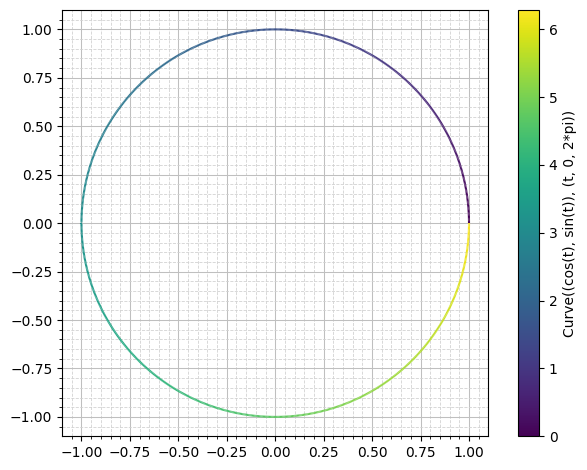

In [25]:
plot_geometry(C)

In [26]:
x, y = symbols('x, y')

line_integrate(omega, C, [x, y])

Integral((dx*P(cos(t), sin(t)) + dy*Q(cos(t), sin(t)))*sqrt(sin(t)**2 + cos(t)**2), (t, 0, 2*pi))

In [27]:
P_uc = Lambda((x, y), .5)
Q_uc = Lambda((x, y), .5)

omega_uc = omega.subs(
    {
        P(x, y): P_uc(x, y),
        Q(x, y): Q_uc(x, y),
        dx: .5,
        dy: .5
    }
)

unit_circle_boundary = line_integrate(omega_uc, C, [x, y])
unit_circle_boundary

1.0*pi

In [28]:
Integral(Q(x, y).diff(x) - P(x, y).diff(y), x, y)

Integral(-Derivative(P(x, y), y) + Derivative(Q(x, y), x), x, y)

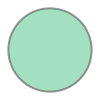

In [29]:
A = Circle(Point(0, 0), 1)
A

In [30]:
vector_integrate(.5, A)

1.0*pi

In [31]:
Eq(
    unit_circle_boundary,
    vector_integrate(.5, A)
)

True

In [50]:
z = symbols('z')

L = Function('L')(x, y, z)
M = Function('M')(x, y, z)
N = Function('N')(x, y, z)

Integral(L.diff(x) - M.diff(y) + N.diff(z), x, y, z)

Integral(Derivative(L(x, y, z), x) - Derivative(M(x, y, z), y) + Derivative(N(x, y, z), z), x, y, z)